## Generating data we want for Linear Regression

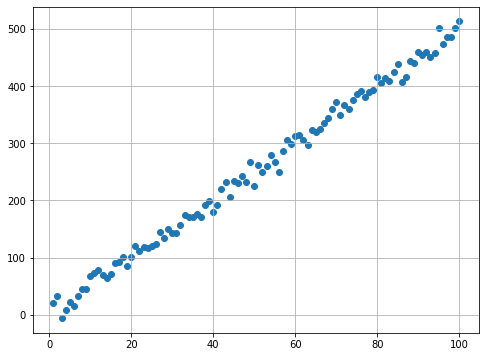

In [1]:
from sklearn.utils import resample
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

x0 = 5 #intercept
x1 = 5 #slope
x = np.linspace(1,100,100)
y = []

for i in range(100):
  s = np.random.normal(x0+x1*i,10)
  y.append(s)

#Plotting the data
plt.figure(figsize=(8,6))
plt.scatter(x,y)
plt.grid()

## Applying Regular LR to the dataset then look at intercept,slope, MSE, and R2

Intercept: 0.9074048955307603
Slope: 4.997479471737881
MSE: 73.57707696035195
R-Squared: 0.99627174247237


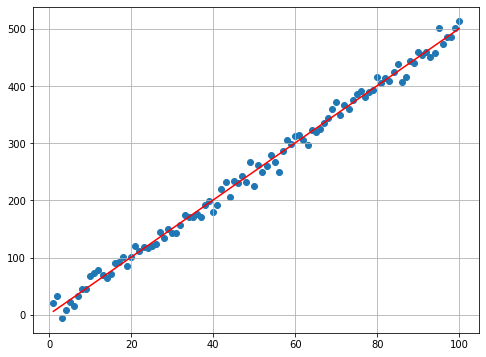

In [2]:
#Regular LR over the whole data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
X_train = X_train.reshape(-1,1)
model = LinearRegression()
model.fit(X_train,y_train)
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")
print(f'MSE: {mean_squared_error(y_test, model.predict(X_test.reshape(-1,1)))}')
print(f'R-Squared: {r2_score(y_test, model.predict(X_test.reshape(-1,1)))}')

#Plot our model against the original data points
plt.figure(figsize=(8,6))
plt.plot(x,model.intercept_ + model.coef_[0]*x,'r')
plt.scatter(x,y)
plt.grid()

## Applying bootstrapping on the data over 'n' iterations and look at metrics

In [3]:
data = np.array((x,y)).T #Creates data in the form of (x1,y1),(x2,y2),etc

iterations = 10
number_of_samples = 50

slope = 0
intercept = 0
MSE = 0
R2 = 0

for i in range(iterations):
  boot = resample(data,n_samples=number_of_samples)
  boot_x = boot[::,0].reshape(-1,1) #boot[::,0] get the x-values back and reshapes it to be compatible with model.fit
  oob = np.array([i for i in data if i not in boot]) #Out-Of-Bag Samples
  model = LinearRegression()
  model.fit(boot_x,boot[::,1]) #boot[::,1] is the array of y-values

  #Adding to slope and intercept
  slope += model.coef_[0]
  intercept += model.intercept_
  MSE += mean_squared_error(oob[::,1],model.predict(oob[::,0].reshape(-1,1)))
  R2 += r2_score(oob[::,1],model.predict(oob[::,0].reshape(-1,1)))

print(f'Average slope over {iterations} iterations: {slope/iterations}')
print(f'Average intercept over {iterations} iterations: {intercept/iterations}')
print(f'Average MSE over {iterations} iterations: {MSE/iterations}')
print(f'Average R-Squared Value over {iterations} iterations: {R2/iterations}')

Average slope over 10 iterations: 4.962772839801415
Average intercept over 10 iterations: 2.8091878753537487
Average MSE over 10 iterations: 131.8043047296813
Average R-Squared Value over 10 iterations: 0.9937188120026234
